In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('datafifa19.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


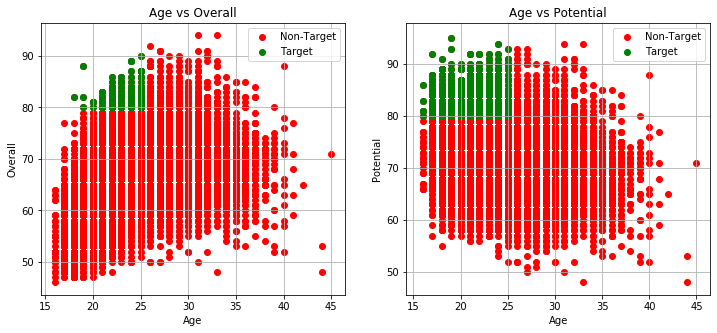

In [3]:
plt.figure(figsize=(12,5))
baba = plt.subplot(121)
plt.scatter(df['Age'], df['Overall'], marker='o', color='r')
xage1=df['Age'][df['Age'] <= 25][df['Overall'] >= 80]
yoverall1 = df['Overall'][df['Age'] <= 25][df['Overall'] >= 80]
plt.scatter(xage1, yoverall1, marker='o', color='g')
baba.set_xlabel('Age')
baba.set_ylabel('Overall')
baba.set_title('Age vs Overall')
baba.legend(['Non-Target','Target'])
baba.grid(True)

babi = plt.subplot(122)
plt.scatter(df['Age'], df['Potential'], marker='o', color='r')
xage2=df['Age'][df['Age'] <= 25][df['Potential'] >= 80]
yoverall2 = df['Potential'][df['Age'] <= 25][df['Potential'] >= 80]
plt.scatter(xage2, yoverall2, marker='o', color='g')
babi.set_xlabel('Age')
babi.set_ylabel('Potential')
babi.set_title('Age vs Potential')
babi.legend(['Non-Target','Target'])
babi.grid(True)

In [4]:
dfnew = df[['Name','Age','Overall','Potential']]
dfnew.head()

,Name,Age,Overall,Potential
0,L. Messi,31,94,94
1,Cristiano Ronaldo,33,94,94
2,Neymar Jr,26,92,93
3,De Gea,27,91,93
4,K. De Bruyne,27,91,92


In [6]:
dfnew.replace('-', int(0), inplace=True)

dfnew['Target'] = 0
dfnew['Target'][(df['Age']<=25)&(df['Overall']>=80)&(df['Potential']>=80)] = 1

dfnew['Target_name'] = 'Non-Target'
dfnew['Target_name'][(df['Age']<=25)&(df['Overall']>=80)&(df['Potential']>=80)] = 'Target'

dfnew.head()

,Name,Age,Overall,Potential,Target,Target_name
0,L. Messi,31,94,94,0,Non-Target
1,Cristiano Ronaldo,33,94,94,0,Non-Target
2,Neymar Jr,26,92,93,0,Non-Target
3,De Gea,27,91,93,0,Non-Target
4,K. De Bruyne,27,91,92,0,Non-Target


In [7]:
X = dfnew.loc[:,['Age','Overall','Potential']]
Y = dfnew['Target']

from sklearn.model_selection import train_test_split
xtr , xts, ytr, yts = train_test_split(X, Y,test_size = .1,random_state=16387)

In [9]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()
model_DT.fit(xtr,ytr)
prediksi_DT = model_DT.predict(xts)
skor_DT = model_DT.score(xts, yts)

print ("Decision Tree Accuracy : %s" % "{0:.4%}".format(skor_DT))

Decision Tree Accuracy : 100.0000%


In [10]:
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()
model_naive.fit(xtr,ytr)
prediksi_naive = model_naive.predict(xts)
skor_naive = model_naive.score(xts, yts)

print ("Naive Bayes Accuracy : %s" % "{0:.4%}".format(skor_naive))

Naive Bayes Accuracy : 99.3959%


In [11]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(xtr,ytr)
prediksi_svm = model_svm.predict(xts)
skor_svm = model_svm.score(xts, yts)

print ("SVM Accuracy : %s" % "{0:.4%}".format(skor_svm))

SVM Accuracy : 98.7370%


In [12]:
dfnew1 = pd.DataFrame([
    {'Name':'Andik Vermansyah','Age':27, 'Overall':87, 'Potential':90},
    {'Name':'Awan Setho Raharjo', 'Age':22, 'Overall':75, 'Potential':83},
    {'Name':'Bambang Pamungkas','Age':38, 'Overall':85, 'Potential':75},
    {'Name':'Cristian Gonzales','Age':43, 'Overall':90, 'Potential':85},
    {'Name':'Egy Maulana Vikri','Age':18, 'Overall':88, 'Potential':90},
    {'Name':'Evan Dimas','Age':24, 'Overall':85, 'Potential':87},
    {'Name':'Febri Hariyadi','Age':23, 'Overall':77, 'Potential':80},
    {'Name':'Hansamu Yama Pranata','Age':24, 'Overall':82, 'Potential':85},
    {'Name':'Septian David Maulana','Age':22, 'Overall':83, 'Potential':80},
    {'Name':'Stefano Lilipaly','Age':29, 'Overall':88, 'Potential':86},
])

dfnew1

,Name,Age,Overall,Potential
0,Andik Vermansyah,27,87,90
1,Awan Setho Raharjo,22,75,83
2,Bambang Pamungkas,38,85,75
3,Cristian Gonzales,43,90,85
4,Egy Maulana Vikri,18,88,90
5,Evan Dimas,24,85,87
6,Febri Hariyadi,23,77,80
7,Hansamu Yama Pranata,24,82,85
8,Septian David Maulana,22,83,80
9,Stefano Lilipaly,29,88,86


In [14]:
dfTest = dfnew1
nilaiX = dfTest.iloc[:,1:]
dfTest['Target'] = model_DT.predict(nilaiX)
print(dfTest)

                    Name  Age  Overall  Potential  Target
0       Andik Vermansyah   27       87         90       0
1     Awan Setho Raharjo   22       75         83       0
2      Bambang Pamungkas   38       85         75       0
3      Cristian Gonzales   43       90         85       0
4      Egy Maulana Vikri   18       88         90       1
5             Evan Dimas   24       85         87       1
6         Febri Hariyadi   23       77         80       0
7   Hansamu Yama Pranata   24       82         85       1
8  Septian David Maulana   22       83         80       1
9       Stefano Lilipaly   29       88         86       0
